<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.5,
    0.6,
    0.65
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [34]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [4]:
data = pd.read_csv('drive/MyDrive/Colab Notebooks/RealMLTask/train.csv') #### Стоит указать свой путь :)

In [5]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

### Посмотрим на "верхушку" данных

In [6]:
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


### Выявим особые значения в данных

##### Посмотрим на nan'ы

In [7]:
data.isna().any()

ClientPeriod                False
MonthlySpending             False
TotalSpent                  False
Sex                         False
IsSeniorCitizen             False
HasPartner                  False
HasChild                    False
HasPhoneService             False
HasMultiplePhoneNumbers     False
HasInternetService          False
HasOnlineSecurityService    False
HasOnlineBackup             False
HasDeviceProtection         False
HasTechSupportAccess        False
HasOnlineTV                 False
HasMovieSubscription        False
HasContractPhone            False
IsBillingPaperless          False
PaymentMethod               False
Churn                       False
dtype: bool

##### Посмотрим на общую таблицу значений

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

### **Вывод**:

Как можно заметить, в данных нет пропусков, что не может не радовать!
Но, к сожалению, все не так сладко: числовая колонна TotalSpent состоит из строк, а иногда они бывают пустыми, так не годится. Преобразуем эти данные в следующем шаге.

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

###### Предобработаем строковые данные в колонке _TotalSpent_

In [9]:
data.loc[data['TotalSpent'] == " ", 'TotalSpent'] = 0.0
data = data.astype({'TotalSpent' : 'float64'})

##### Построим гистограмму распределения численных данных *данных*



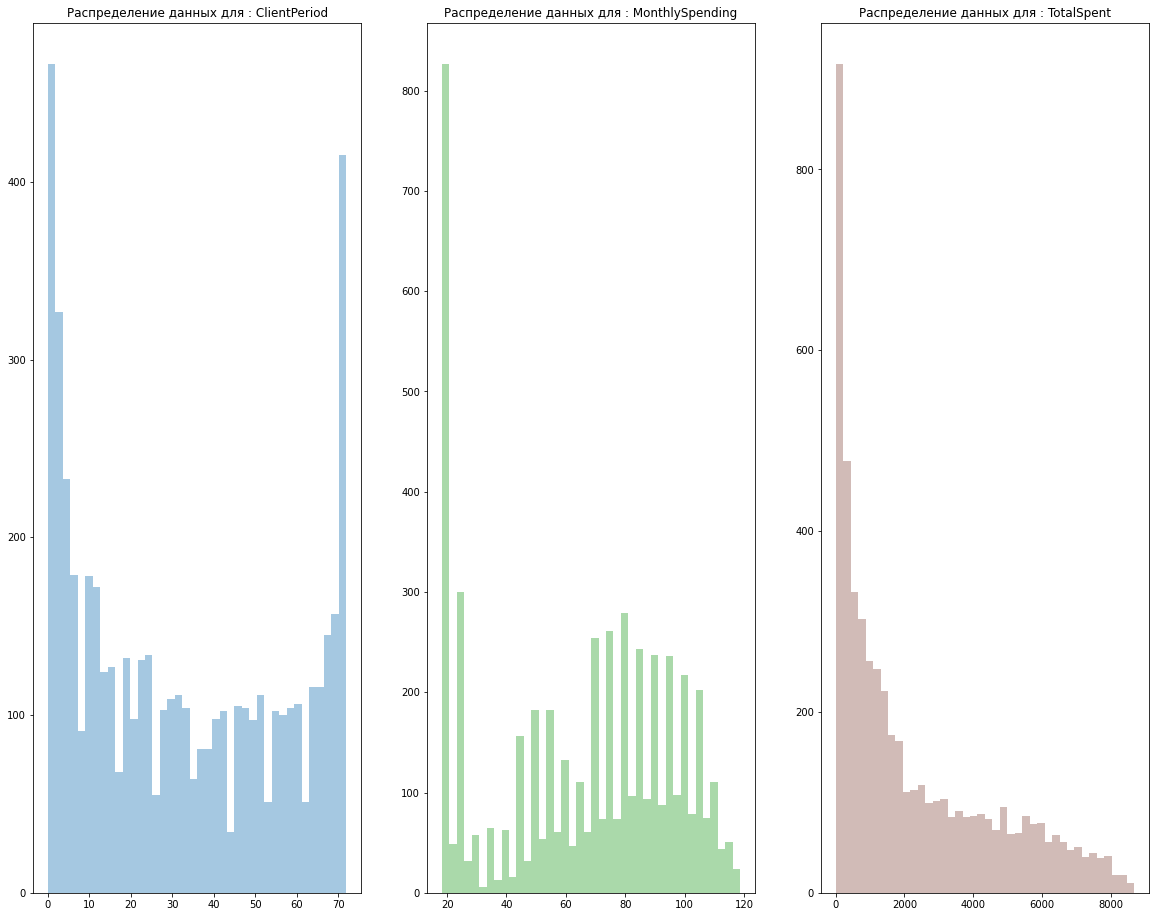

In [36]:
plt.figure(figsize=(20, 16))
colors = cm.tab10(np.linspace(0, 1, 5))
for i, col in enumerate(num_cols):
  plt.subplot(1, 3, i + 1)
  plt.title(f"Распределение данных для : {col}")
  sample = data[col]
  plt.hist(
      sample.to_numpy(),
      bins=40,
      alpha=0.4,
      color=colors[i]
  )
plt.show()

##### Построим распределения для категориальных признаков

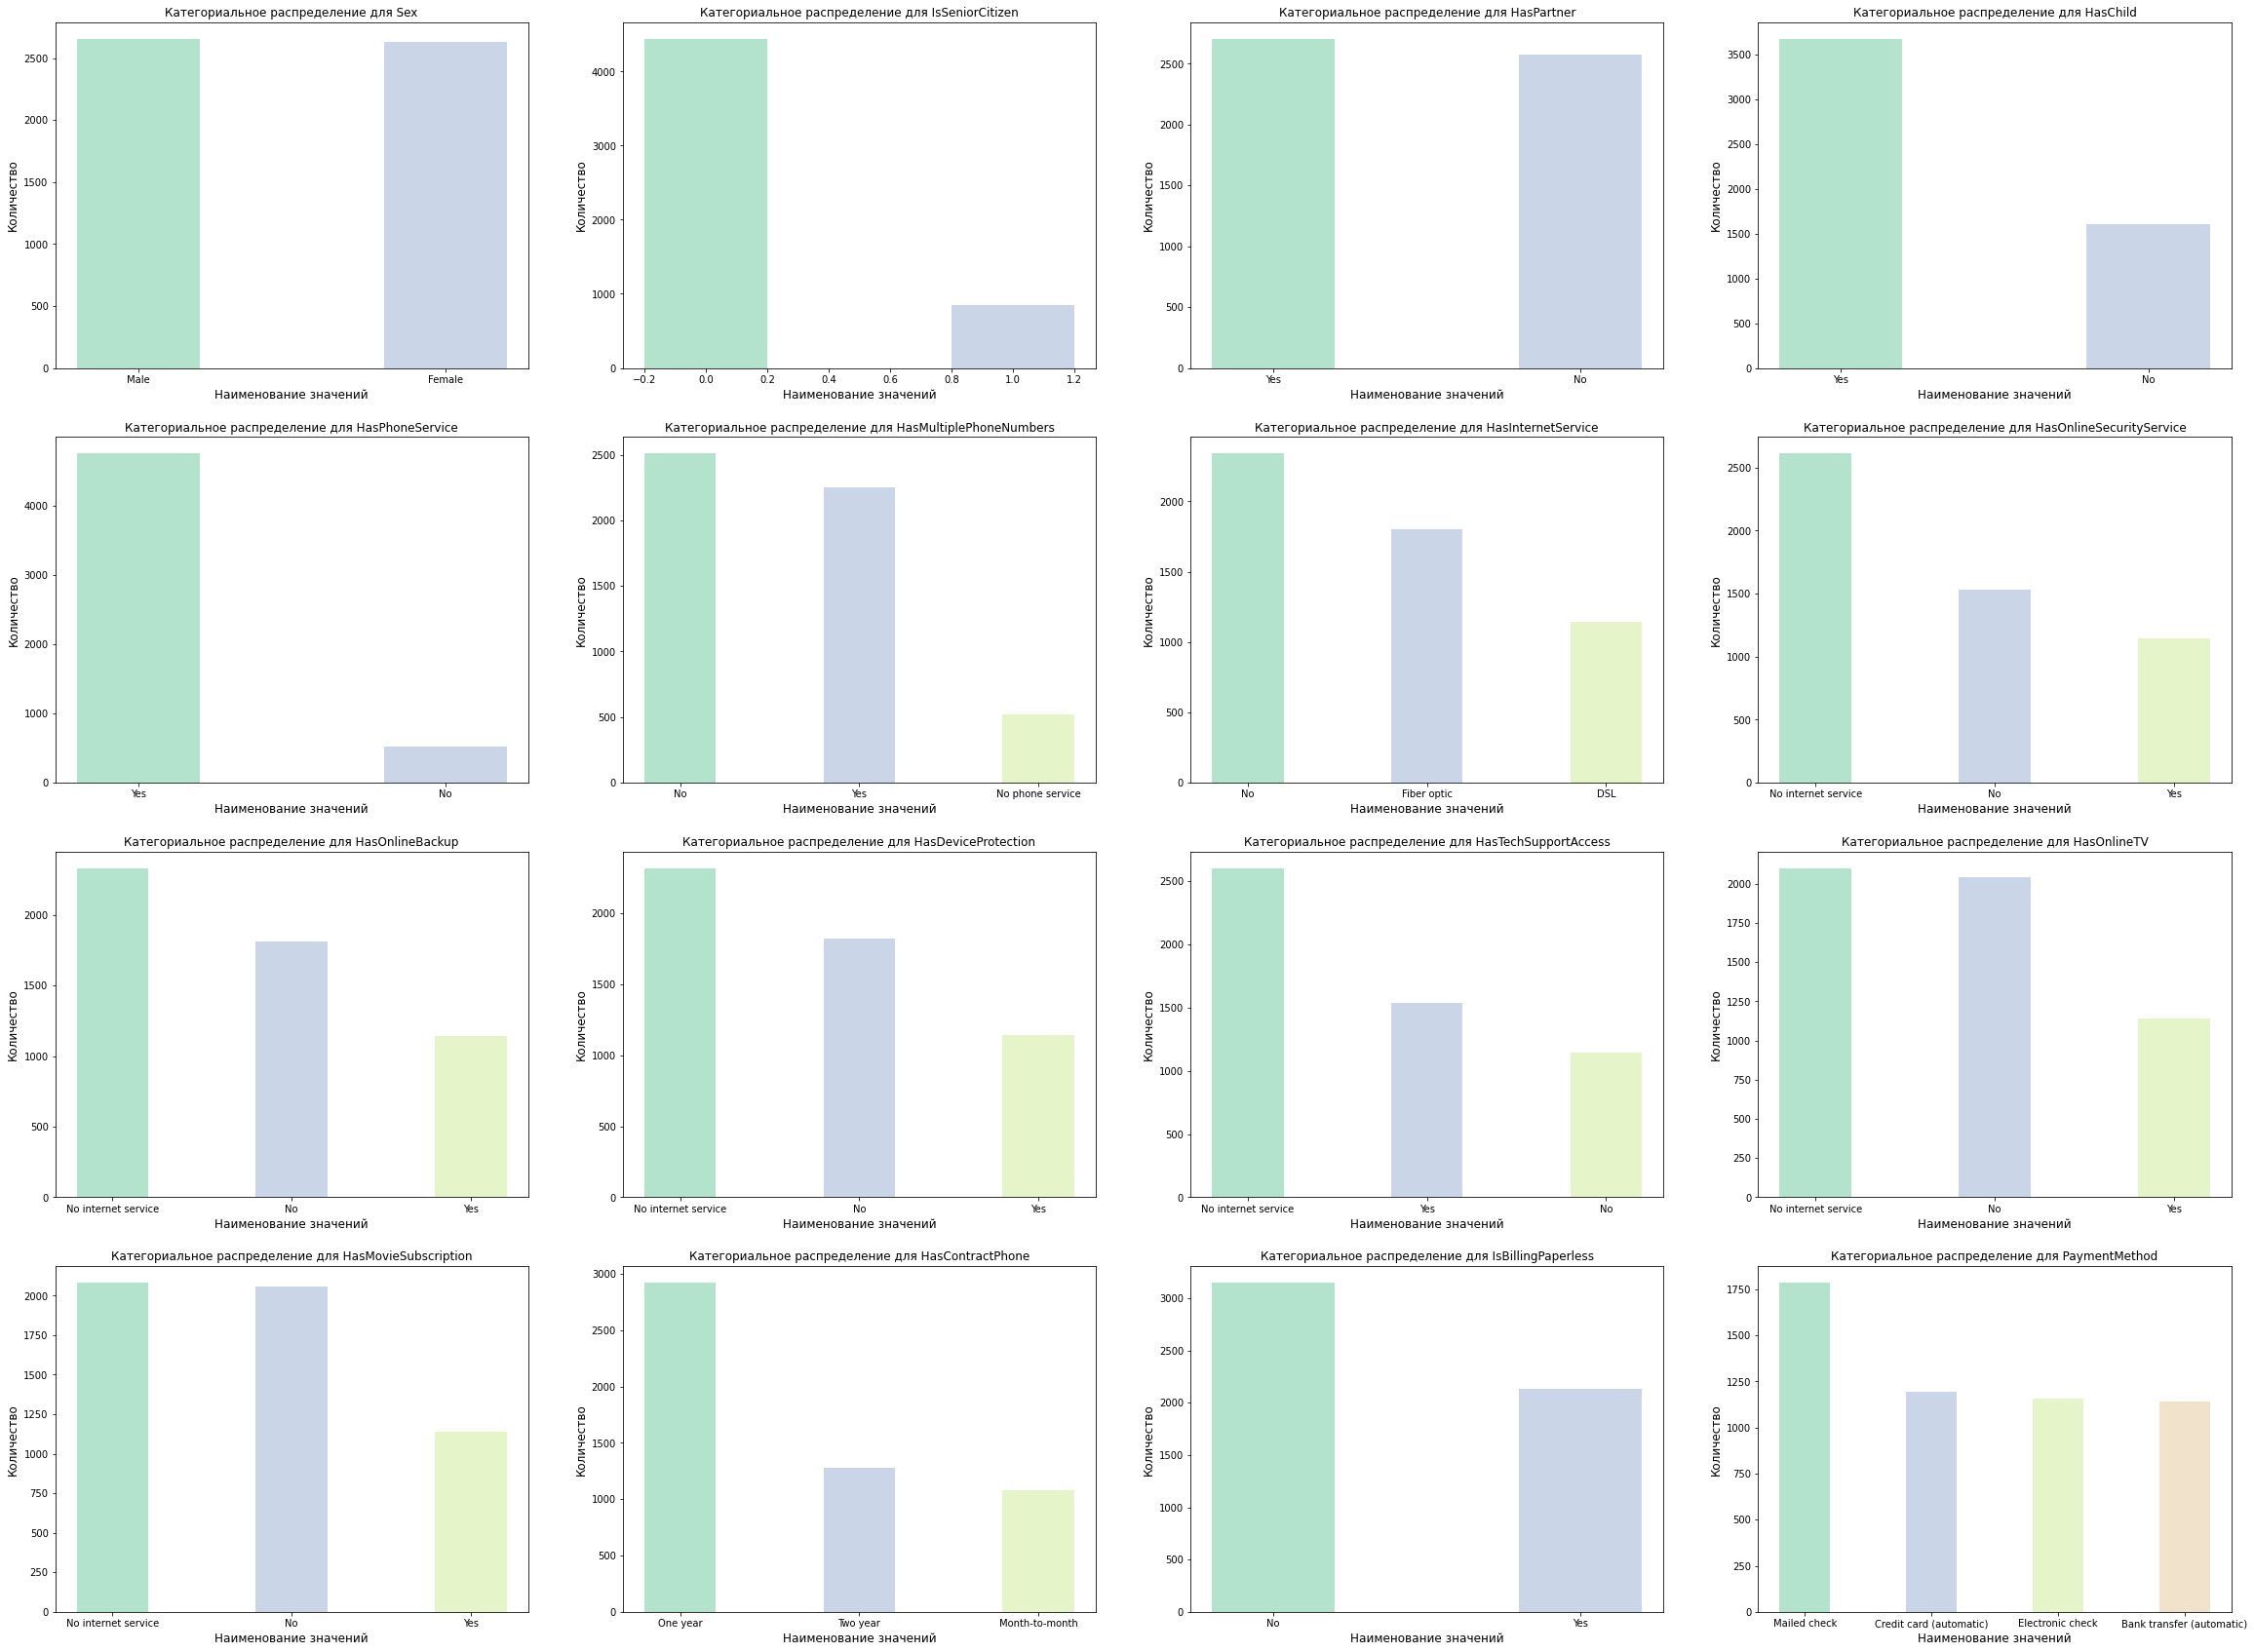

In [37]:

plt.figure(figsize=(40, 30))
colors = cm.Pastel2(np.linspace(0, 1, 5))
for i, col in enumerate(cat_cols):
  plt.subplot(4, 4, i + 1)
  plt.title(f"Категориальное распределение для {col}")
  sample = data[col]

  plt.bar(sample.unique(), 
          sample.value_counts(), 
          color=colors,
          width=0.4)

  plt.xlabel('Наименование значений', fontsize=12)
  plt.ylabel('Количество', fontsize=12)
plt.show()

##### Посмотрим на распределение целевой переменной

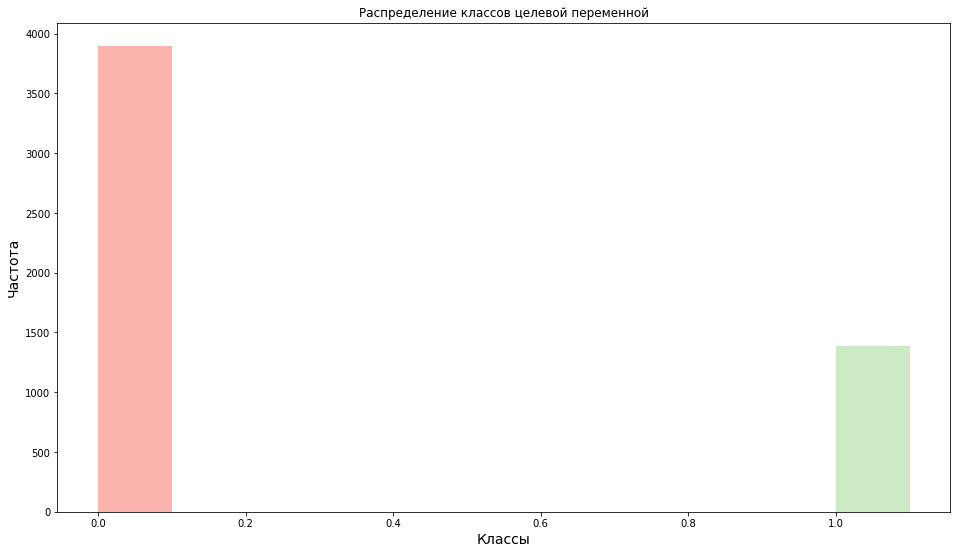

In [38]:
sample = data[target_col]
colors = cm.Pastel1(np.linspace(0, 1, 5))
plt.figure(figsize=(16, 9))
plt.title("Распределение классов целевой переменной")
plt.bar(
    sample.unique(),
    sample.value_counts(),
    width=0.1,
    align = 'edge',
    color=colors
)
plt.xlabel("Классы", fontsize=14)
plt.ylabel("Частота", fontsize=14)
plt.show()

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

### **Вывод**:

В основном, данные не равномерно распределены, это особенно видно по значениям целевой переменной.

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [13]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA

###### Обработаем данные 

Для начала построим пайплайн классификатора

In [14]:
# Применяем SimpleImputer и будем искать различные скейлеры с помощью GridSearchCV
numerical_transformer = Pipeline(steps=[('imputer', SimpleImputer()),
                                        ('scaler', 'passthrough')])

# Применение SimpleImputer, а затем OneHotEncoder
categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer()),
                                          ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Собираем воедино трансформеры для числовых и категориальных признаков
data_transformer = ColumnTransformer(transformers=[
                                    ('numerical', numerical_transformer, num_cols),
                                    ('categorical', categorical_transformer, cat_cols)])


# Создание конвейера препроцессора, который сначала преобразует данные и затем применяет PCA.
preprocessor = Pipeline(steps=[('data_transformer', data_transformer),
                               ('reduce_dim',PCA())])

# we are using Logistics Regression here
classifier = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', LogisticRegression(random_state=0, max_iter=10000))])

In [15]:

#Мы можем использовать сетку параметров для проверки лучших гиперпараметров или трансформаторов.
param_grid = {
    'preprocessor__data_transformer__numerical__imputer__strategy': ['mean', 'median'],
    'preprocessor__data_transformer__categorical__imputer__strategy': ['constant','most_frequent'],
    'preprocessor__data_transformer__numerical__scaler': [StandardScaler(), RobustScaler(), \
                                                          MinMaxScaler()],
    'classifier__C': [0.1, 1.0, 10, 100]
}

##### Обучим модель

In [16]:
X = data[feature_cols]
y = data[target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

clf = GridSearchCV(classifier, param_grid=param_grid, scoring='roc_auc')
clf.fit(X, y)

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        Pipeline(memory=None,
                                                 steps=[('data_transformer',
                                                         ColumnTransformer(n_jobs=None,
                                                                           remainder='drop',
                                                                           sparse_threshold=0.3,
                                                                           transformer_weights=None,
                                                                           transformers=[('numerical',
                                                                                          Pipeline(memory=None,
                                                                                                   steps=[('imputer',
         

#### Полученный скор:

In [17]:
results = pd.DataFrame(clf.cv_results_)
results.sort_values(by='rank_test_score', inplace=True)
results = results.reset_index(drop = True)
print('1 фолд:', results['split0_test_score'][0])
print('2 фолд:', results['split1_test_score'][0])
print('3 фолд:', results['split2_test_score'][0])
print('4 фолд:', results['split3_test_score'][0])
print('5 фолд:', results['split4_test_score'][0])

y_pred = clf.predict(X_test)

print('roc_auc', roc_auc_score(y_test, y_pred))


1 фолд: 0.8622651115430898
2 фолд: 0.8369897250763677
3 фолд: 0.8345642883686363
4 фолд: 0.8560961706899988
5 фолд: 0.8357145836326308
roc_auc 0.7257112786625028


#### Лучшие параметры:

In [18]:
clf.best_params_

{'classifier__C': 100,
 'preprocessor__data_transformer__categorical__imputer__strategy': 'constant',
 'preprocessor__data_transformer__numerical__imputer__strategy': 'mean',
 'preprocessor__data_transformer__numerical__scaler': RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
              with_scaling=True)}

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [39]:
!pip install catboost

     |████████████████████████████████| 67.3MB 40kB/s 


In [43]:
from catboost import CatBoostClassifier
data = pd.read_csv('drive/MyDrive/Colab Notebooks/RealMLTask/train.csv') #### Стоит указать свой путь :)

##### Протестируем catboost со стандартными параметрами

In [154]:
X = data[feature_cols]
y = data[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

model = CatBoostClassifier()
model.fit(X_train, y_train, cat_features=cat_cols)

preds_class = model.predict(X_test)
preds_proba = model.predict_proba(X_test)[:, 1]

print('roc_auc class', roc_auc_score(y_test, preds_class))
print('roc_auc proba', roc_auc_score(y_test, preds_proba))

Learning rate set to 0.018544
0:	learn: 0.6843782	total: 7.43ms	remaining: 7.42s
1:	learn: 0.6717213	total: 19.8ms	remaining: 9.88s
2:	learn: 0.6608375	total: 30.2ms	remaining: 10s
3:	learn: 0.6494459	total: 42ms	remaining: 10.4s
4:	learn: 0.6391473	total: 52.9ms	remaining: 10.5s
5:	learn: 0.6284542	total: 63.4ms	remaining: 10.5s
6:	learn: 0.6191058	total: 73ms	remaining: 10.3s
7:	learn: 0.6098466	total: 85.1ms	remaining: 10.5s
8:	learn: 0.6009238	total: 95.8ms	remaining: 10.5s
9:	learn: 0.5931536	total: 105ms	remaining: 10.4s
10:	learn: 0.5862281	total: 112ms	remaining: 10s
11:	learn: 0.5783247	total: 122ms	remaining: 10s
12:	learn: 0.5712628	total: 132ms	remaining: 10s
13:	learn: 0.5645719	total: 141ms	remaining: 9.94s
14:	learn: 0.5580225	total: 152ms	remaining: 9.96s
15:	learn: 0.5520051	total: 163ms	remaining: 10s
16:	learn: 0.5463086	total: 174ms	remaining: 10.1s
17:	learn: 0.5407915	total: 185ms	remaining: 10.1s
18:	learn: 0.5351763	total: 199ms	remaining: 10.3s
19:	learn: 0.530

##### Попробуем подобрать параметры l2_leaf_reg и n_estimators

In [146]:
model = CatBoostClassifier(
                            learning_rate=0.1,
                            n_estimators=500,
                            l2_leaf_reg=0.1

                          )
model.fit(X_train, y_train, cat_features=cat_cols)

preds_class = model.predict(X_test)
preds_proba = model.predict_proba(X_test)[:, 1]

print('roc_auc class', roc_auc_score(y_test, preds_class))
print('roc_auc proba', roc_auc_score(y_test, preds_proba))

0:	learn: 0.6304690	total: 11.4ms	remaining: 5.71s
1:	learn: 0.5746188	total: 23.8ms	remaining: 5.94s
2:	learn: 0.5369788	total: 36.1ms	remaining: 5.99s
3:	learn: 0.5127396	total: 41.1ms	remaining: 5.1s
4:	learn: 0.4894766	total: 52ms	remaining: 5.15s
5:	learn: 0.4703685	total: 64.2ms	remaining: 5.29s
6:	learn: 0.4554199	total: 76ms	remaining: 5.36s
7:	learn: 0.4437304	total: 87.3ms	remaining: 5.37s
8:	learn: 0.4351642	total: 99.2ms	remaining: 5.41s
9:	learn: 0.4300024	total: 108ms	remaining: 5.32s
10:	learn: 0.4239137	total: 121ms	remaining: 5.36s
11:	learn: 0.4190193	total: 132ms	remaining: 5.39s
12:	learn: 0.4127320	total: 145ms	remaining: 5.44s
13:	learn: 0.4084996	total: 158ms	remaining: 5.48s
14:	learn: 0.4065658	total: 169ms	remaining: 5.47s
15:	learn: 0.4016860	total: 180ms	remaining: 5.46s
16:	learn: 0.4010297	total: 184ms	remaining: 5.23s
17:	learn: 0.3984968	total: 195ms	remaining: 5.23s
18:	learn: 0.3962178	total: 205ms	remaining: 5.18s
19:	learn: 0.3941600	total: 218ms	rem

##### Получилось не очень, попробуем поиск по сетке

In [158]:
X = data[feature_cols]
y = data[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
model = CatBoostClassifier(cat_features=cat_cols)
grid = {'learning_rate': [0.03, 0.1],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [0.1, 1, 3, 5, 7, 9, 20, 100]}

grid_search_result = model.grid_search(grid, 
                                       X=X, 
                                       y=y, 
                                       plot=True,
                                       refit=True
                                       )


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Выходные данные были обрезаны до нескольких последних строк (5000).
21:	learn: 0.4854741	test: 0.4657925	best: 0.4657925 (21)	total: 704ms	remaining: 31.3s
22:	learn: 0.4818378	test: 0.4614593	best: 0.4614593 (22)	total: 712ms	remaining: 30.3s
23:	learn: 0.4786629	test: 0.4576648	best: 0.4576648 (23)	total: 721ms	remaining: 29.3s
24:	learn: 0.4754658	test: 0.4538039	best: 0.4538039 (24)	total: 732ms	remaining: 28.5s
25:	learn: 0.4716601	test: 0.4506166	best: 0.4506166 (25)	total: 780ms	remaining: 29.2s
26:	learn: 0.4679464	test: 0.4470199	best: 0.4470199 (26)	total: 842ms	remaining: 30.3s
27:	learn: 0.4645965	test: 0.4437218	best: 0.4437218 (27)	total: 915ms	remaining: 31.8s
28:	learn: 0.4620071	test: 0.4409071	best: 0.4409071 (28)	total: 928ms	remaining: 31.1s
29:	learn: 0.4592665	test: 0.4385280	best: 0.4385280 (29)	total: 987ms	remaining: 31.9s
30:	learn: 0.4564625	test: 0.4360804	best: 0.4360804 (30)	total: 1.04s	remaining: 32.6s
31:	learn: 0.4537437	test: 0.4333594	best: 0.4333594

In [165]:
X = data[feature_cols]
y = data[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

preds_class = model.predict(X_test)
preds_proba = model.predict_proba(X_test)[:, 1]

print('roc_auc class', roc_auc_score(y_test, preds_class))
print('roc_auc proba', roc_auc_score(y_test, preds_proba))

roc_auc class 0.7865171697566116
roc_auc proba 0.90450561870891


# Предсказания

In [166]:
best_model = model

In [167]:
X_test = pd.read_csv('drive/MyDrive/Colab Notebooks/RealMLTask/test.csv')
submission = pd.read_csv('drive/MyDrive/Colab Notebooks/RealMLTask/submission.csv')

submission['Churn'] = best_model.predict_proba(X_test)[:, 1]
submission.to_csv('drive/MyDrive/Colab Notebooks/RealMLTask/my_submission.csv', index=False)

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.